## Week 7 Exercises

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from numpy import pi, cos, sin, e, exp, log

1. Finding the zeros of the Bessel functions. (10 points)
This problem builds on last week’s problem in which you plotted the
Bessel function of the first kind, J1(x), over the range 0 ≤ x ≤ 20.
Repeat this plot: it will show you that you have a number of zeroes
(i.e. values of x for which J1(x) = 0. Use your plot to figure out how
many there are in this range, and roughly where those zeroes lie. Then
find a way to sample the function at suitable intervals, and by checking
where it changes sign, find the zeroes of J1(x) in the range 0 ≤ x ≤ 20.

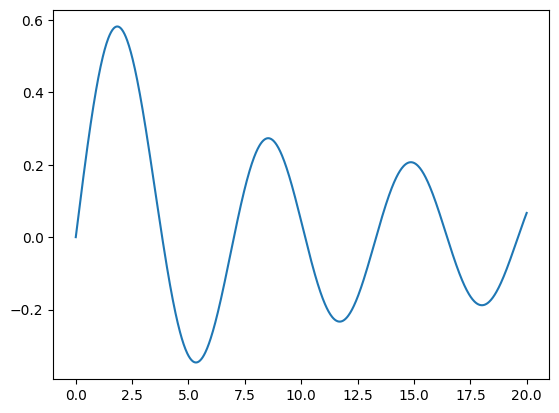

Zeros for the Bessel Function: 0, 3.823823823823824, 7.007007007007007, 10.17017017017017, 13.313313313313314, 16.456456456456458, 19.5995995995996

In [75]:
def J1Integrand(u, x):
    return np.cos(u - x * np.sin(u))

def besselFunc(x):
    integral, _ = scipy.integrate.quad(J1Integrand, 0, np.pi, args=(x,))
    return integral / np.pi

besselFuncVec = np.vectorize(besselFunc)
X = np.linspace(0,20,1000)
Y = besselFuncVec(X)
plt.figure()
plt.plot(X, Y)
plt.show()
zeroIndices = np.where(np.diff(np.sign(Y)))[0]
print("Zeros for the Bessel Function: 0", end = '')
for i in (zeroIndices):
    print(", " + str(X[i]), end='')


2. Solving ODEs: Euler algorithm for the Simple Harmonic Os-
cillator
The Euler method for solving a differential equation is perhaps the
simplest method you can think of. Given
dy
dt = f (y, t)
this is written as a finite difference equation, where each new time is
calculated based on the previous value and a small time increment. This is accurate to linear order in the expansion parameter, which represents
the time increment h = ∆t:
y(t + h) = y(t) + hf (y, t) or equivalently,
yn+1 = yn + hf (yn, tn).
If the time interval is divided into N steps, h = (b − a)/N , where a, b
are the starting and ending t values respectively.
Use the Euler method to solve the differential equation for a simple
harmonic oscillator. The equation of motion for a mass and spring
system is
md2x
dt2 = −kx
This can be written as two linear ordinary differential equations (ODES):
dx
dt = v (1)
dv
dt = − k
mx (2)
Write each of these as a finite difference equation. Set k = 100 N/m
and m = 1 kg. Use an initial values of v = 0 m/s, and x = 0.1 m.
Using the Euler algorithm with a timestep h = 0.01s for both x and v,
(a) (5 points) Plot x and v as a function of time on two separate
graphs. Label your axes!
(b) (5 points) Plot total energy as a function of time.
(c) (5 points) Plot x vs v (phase space plot).
(d) (5 points) Finally, make your timestep h = 0.001 and 0.0001 and
increase the total number of steps N by a factor of 10 each time.
How do your results change for the energy plot (b)?
(e) (5 points) Describe what you observe for each plot. Do you see
why this algorithm is problematic? Explain in a markdown cell.

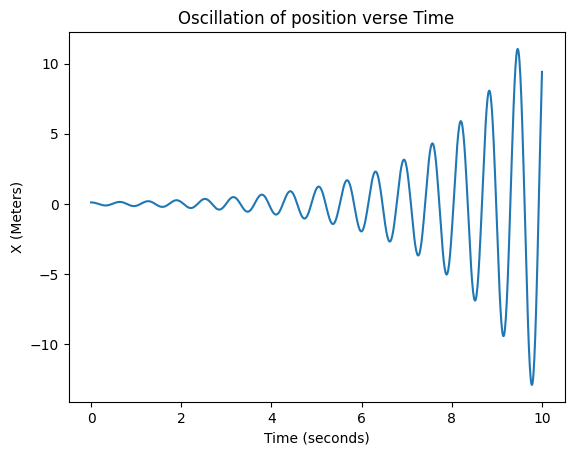

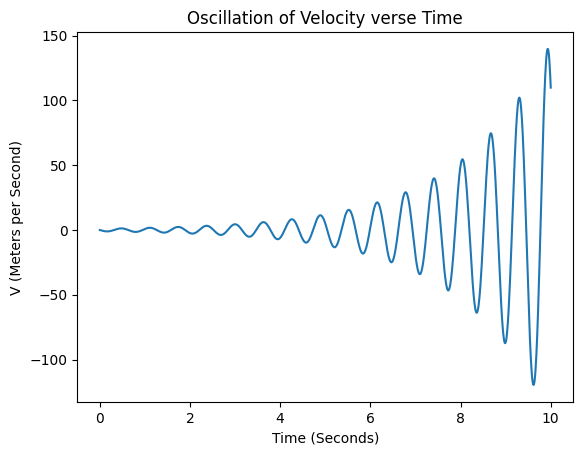

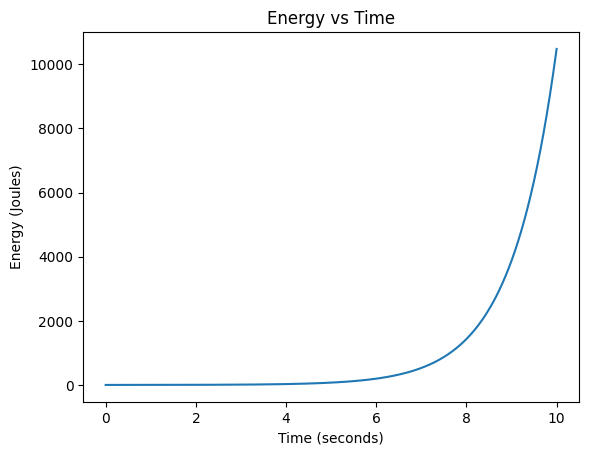

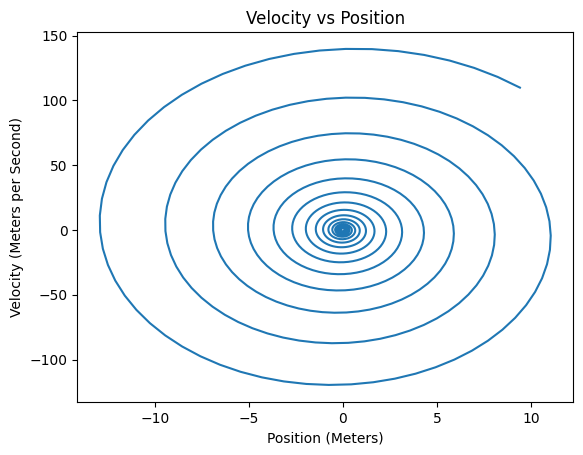

In [76]:
def eulerAlg(start, final, x0, v0, h):
    T = np.arange(start, final+h, h)
    N = np.abs(int((start-final)/h))
    X = np.zeros(N+1)
    V = np.zeros(N+1)
    V[0], X[0] = v0, x0
    for i in range(N):
        X[i+1] = X[i] + h * V[i]
        V[i+1] = V[i] - h * 100 * X[i]
    return X, V, T


def eulerPlot(start, final, x0, v0, h):
    X, V, H = eulerAlg(start, final, x0, v0, h)
    plt.figure()
    plt.plot(H, X)
    plt.xlabel("Time (seconds)")
    plt.ylabel("X (Meters)")
    plt.title("Oscillation of position verse Time")
    plt.show()

    plt.figure()
    plt.plot(H, V)
    plt.xlabel("Time (Seconds)")
    plt.ylabel("V (Meters per Second)")
    plt.title("Oscillation of Velocity verse Time")
    plt.show()

    E = 0.5*100*X*X+0.5*V*V
    plt.figure()
    plt.plot(H, E)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Energy (Joules)")
    plt.title("Energy vs Time")
    plt.show()

    plt.figure()
    plt.plot(X, V)
    plt.xlabel("Position (Meters)")
    plt.ylabel("Velocity (Meters per Second)")
    plt.title("Velocity vs Position")
    plt.show()

eulerPlot(0, 10, 0.1, 0, 0.01)


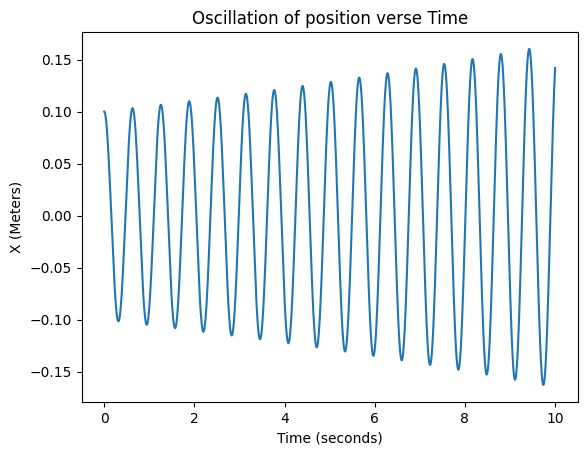

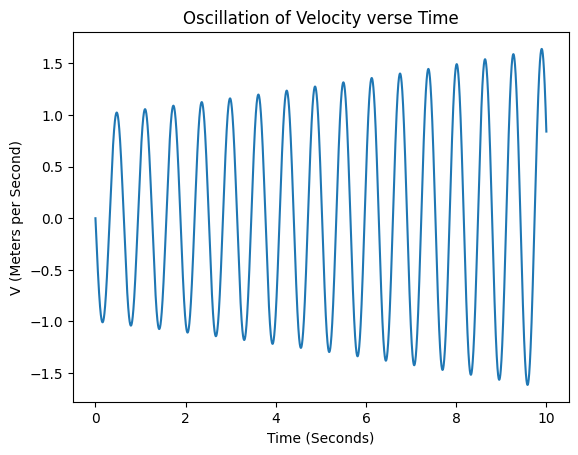

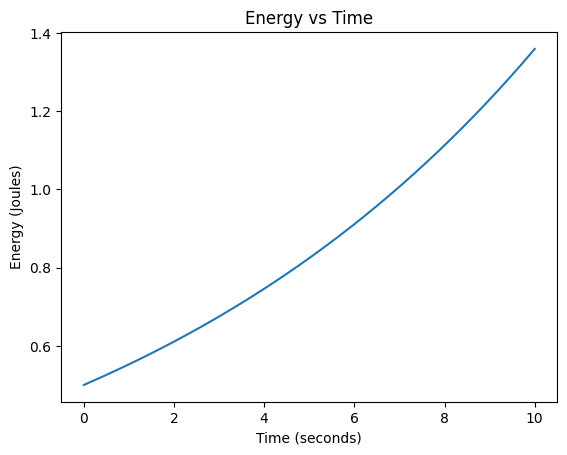

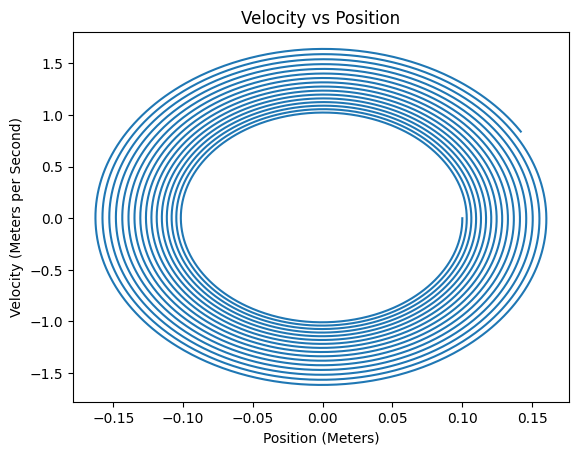

In [77]:
eulerPlot(0, 10, 0.1, 0, 0.001)

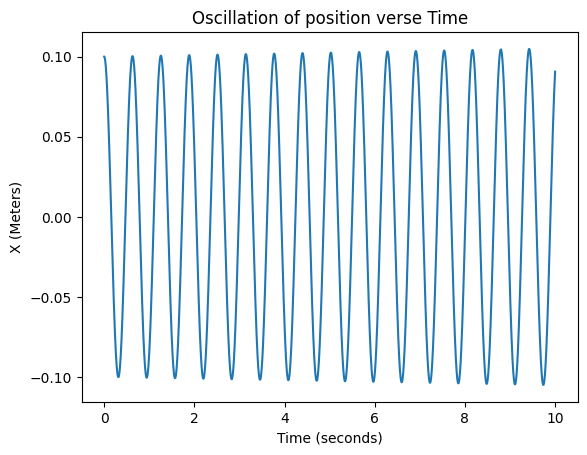

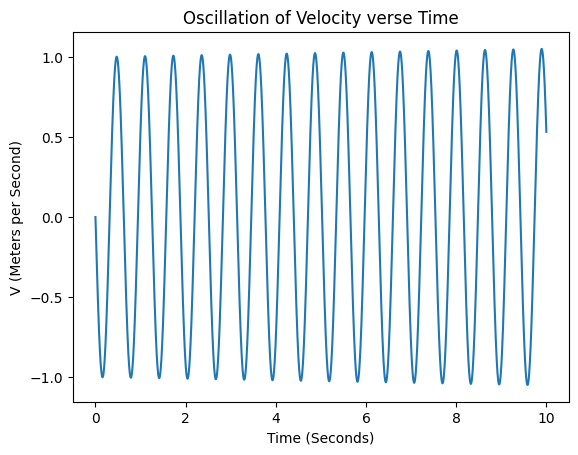

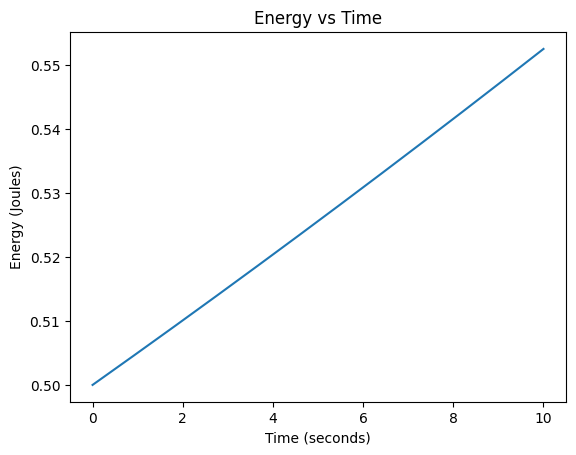

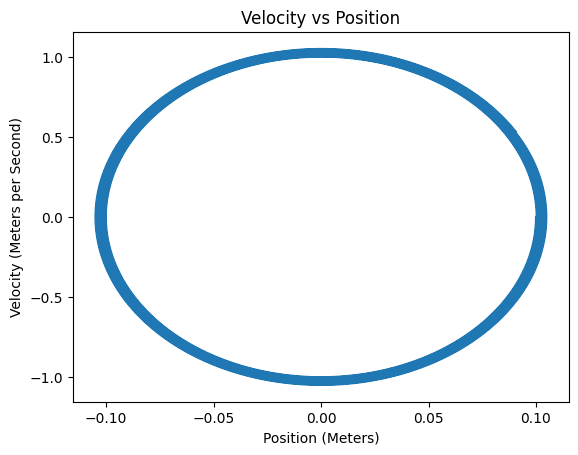

In [78]:
eulerPlot(0, 10, 0.1, 0, 0.0001)

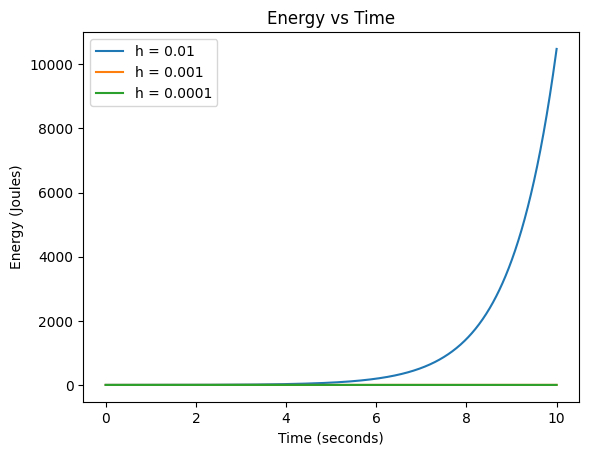

In [79]:
def eulerPlot(start, final, x0, v0, h0, h1, h2):
    X1, V1, H1= eulerAlg(start, final, x0, v0, h0)
    X2, V2, H2 = eulerAlg(start, final, x0, v0, h1)
    X3, V3, H3 = eulerAlg(start, final, x0, v0, h2)
    
    E1 = 0.5*100*X1*X1+0.5*V1*V1
    E2 = 0.5*100*X2*X2+0.5*V2*V2
    E3 = 0.5*100*X3*X3+0.5*V3*V3
    plt.figure()
    plt.plot(H1, E1, label = f"h = {h0}")
    plt.plot(H2, E2, label = f"h = {h1}")
    plt.plot(H3, E3, label = f"h = {h2}")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Energy (Joules)")
    plt.title("Energy vs Time")
    plt.legend()
    plt.show()


eulerPlot(0, 10, 0.1, 0, 0.01, 0.001, 0.0001)

The algorithm is problematic because it has the energy increase with time, insinuating that energy is being created as time passes.

3. Solving ODEs: Euler-Cromer algorithm
(a) (5 points) Modify your code for the previous problem 2 to first
update the velocity v, then update x, such that the new x
value uses the updated v. This is the Euler-Cromer algorithm.
Repeat steps (a) - (c) of Problem 2.
(b) (5 points) How do your results change? Explain in a markdown
cell.

In [80]:
def eulerAlg3(start, final, x0, v0, h):
    T = np.arange(start, final+h, h)
    N = np.abs(int((start-final)/h))
    X = np.zeros(N+1)
    V = np.zeros(N+1)
    V[0], X[0] = v0, x0
    for i in range(N):
        V[i+1] = V[i] - h * 100 * X[i]
        X[i+1] = X[i] + h * V[i+1]
    return X, V, T

def eulerPlot3(start, final, x0, v0, h):
    X, V, H = eulerAlg3(start, final, x0, v0, h)
    plt.figure()
    plt.plot(H, X)
    plt.xlabel("Time (seconds)")
    plt.ylabel("X (Meters)")
    plt.title("Oscillation of position verse Time")
    plt.show()

    plt.figure()
    plt.plot(H, V)
    plt.xlabel("Time (Seconds)")
    plt.ylabel("V (Meters per Second)")
    plt.title("Oscillation of Velocity verse Time")
    plt.show()

    E = 0.5*100*X*X+0.5*V*V
    plt.figure()
    plt.plot(H, E)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Energy (Joules)")
    plt.title("Energy vs Time")
    plt.show()

    plt.figure()
    plt.plot(X, V)
    plt.xlabel("Position (Meters)")
    plt.ylabel("Velocity (Meters per Second)")
    plt.title("Velocity vs Position")
    plt.show()

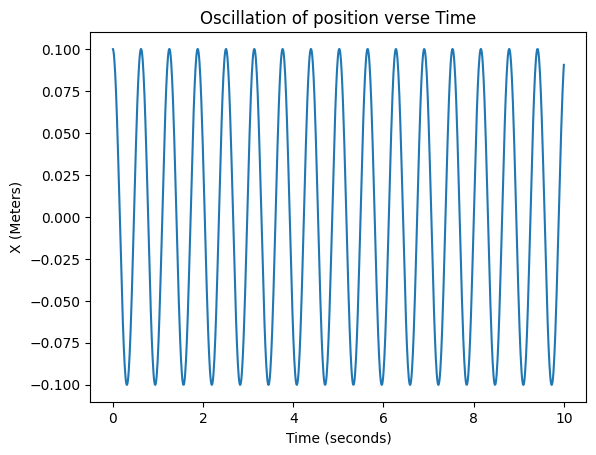

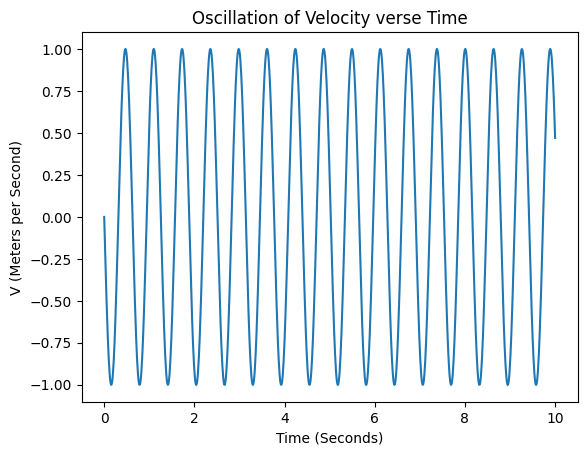

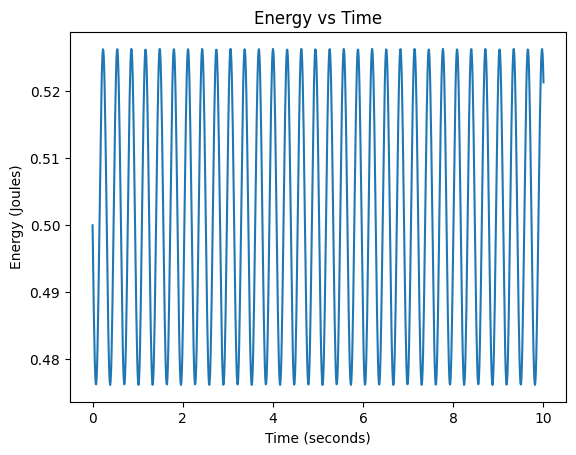

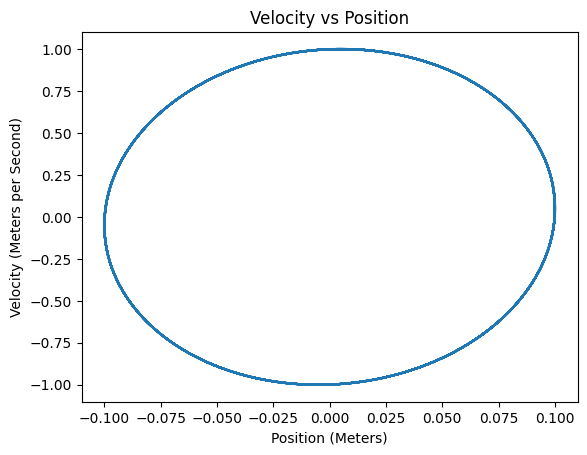

In [81]:
eulerPlot3(0, 10, 0.1, 0, 0.01)

The resluts for velocity with respect to position is more of a skewed circle, the oscillations of velocity or position versus time seems roughly the same. The largest discrepancy appears to be in the energy versus time graph where it oscillates around a single value, instead of continuously increasing. The energy instead fluctuates, a more reasonable result.

2nd order Runge-Kutta algorithm
In the previous exercises, you compared the Euler and Euler-Cromer
methods for integrating the second order differential equation of a sim-
ple harmonic oscillator. You would have observed that the Euler-
Cromer does a little better in some respects. Here, you will use a
second order Runge Kutta method to solve the same system.
(a) (10 points) Write your own 2nd order Runge Kutta code, then
compute and plot x and v as a function of time on two separate
graphs.
(b) (5 points) Plot total energy as a function of time.
(c) (5 points) Plot x vs v (phase space plot).
(d) (5 points) How do your results for the Runge Kutta algorithm
compare with those from Euler-Cromer? Explain in a markdown
cell.

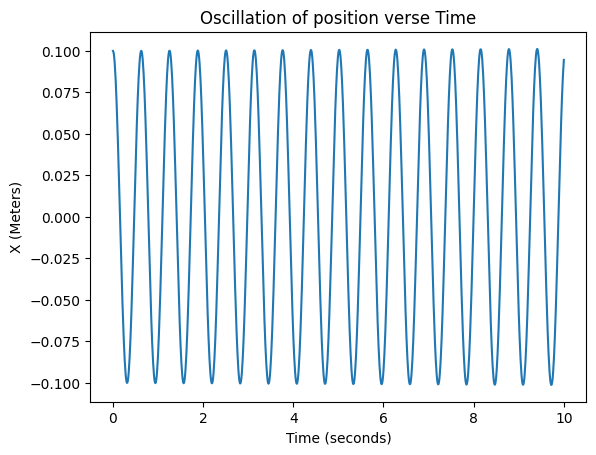

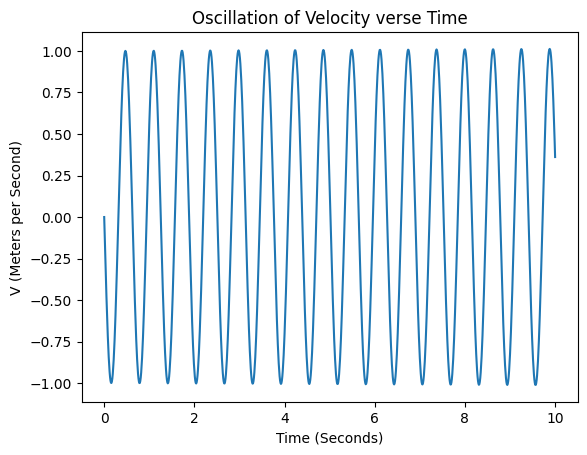

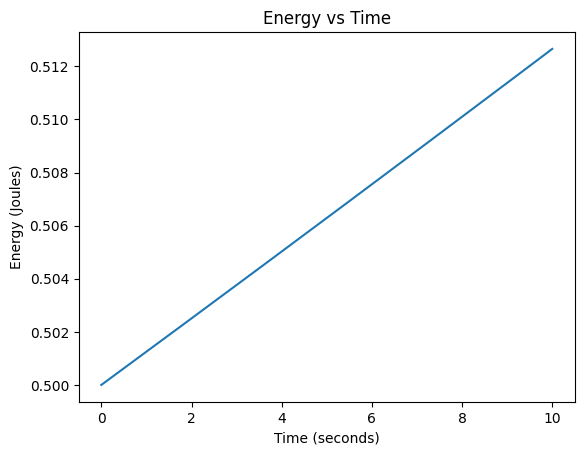

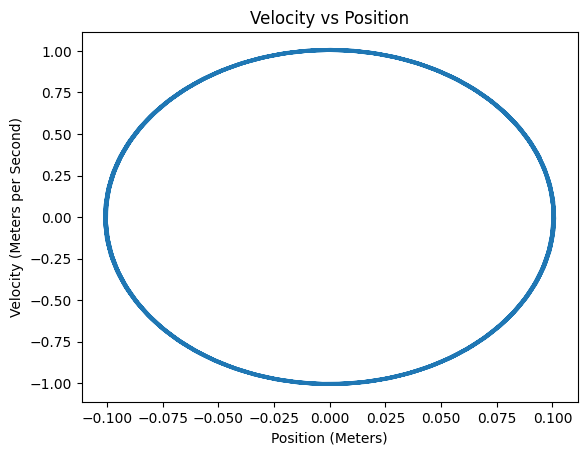

In [82]:

def rungeKutta(start, final, x0, v0, h):
    T = np.arange(start, final+h, h)
    N = np.abs(int((final-start)/h))
    X = np.zeros(N+1)
    V = np.zeros(N+1)
    V[0], X[0] = v0, x0
    for i in range(N):
        k1_x = h*V[i]
        k1_v = h*(-100)*X[i]

        k2_x = h*(V[i]+k1_v/2)
        k2_v = h*(-100*(X[i]+k1_x/2))
        V[i+1] = k2_v + V[i]
        X[i+1] = k2_x + X[i]
    return X, V, T


def rungeKuttaPlot(start, final, x0, v0, h):
    X, V, H = rungeKutta(start, final, x0, v0, h)
    plt.figure()
    plt.plot(H, X)
    plt.xlabel("Time (seconds)")
    plt.ylabel("X (Meters)")
    plt.title("Oscillation of position verse Time")
    plt.show()

    plt.figure()
    plt.plot(H, V)
    plt.xlabel("Time (Seconds)")
    plt.ylabel("V (Meters per Second)")
    plt.title("Oscillation of Velocity verse Time")
    plt.show()

    E = 0.5*100*X*X+0.5*V*V
    plt.figure()
    plt.plot(H, E)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Energy (Joules)")
    plt.title("Energy vs Time")
    plt.show()

    plt.figure()
    plt.plot(X, V)
    plt.xlabel("Position (Meters)")
    plt.ylabel("Velocity (Meters per Second)")
    plt.title("Velocity vs Position")
    plt.show()

rungeKuttaPlot(0, 10, 0.1, 0, 0.01)

The accuracy of the Runge-Kutta is significantly greater than the euler-Cromer accuracy (O(${h^2}$) instead of O(h)). This means that our velocity vs position no longer has the skew, but energy no longer oscillates and is slowly created over time. 

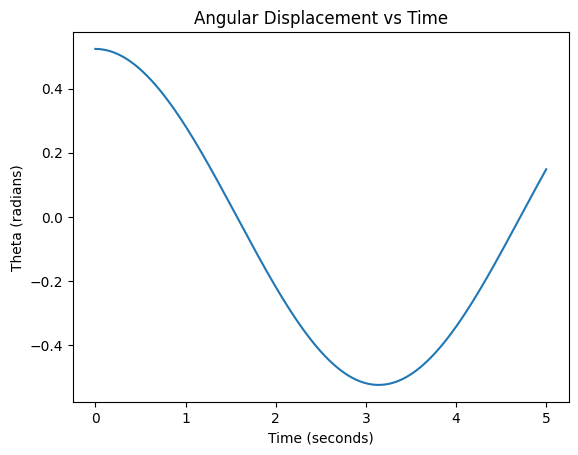

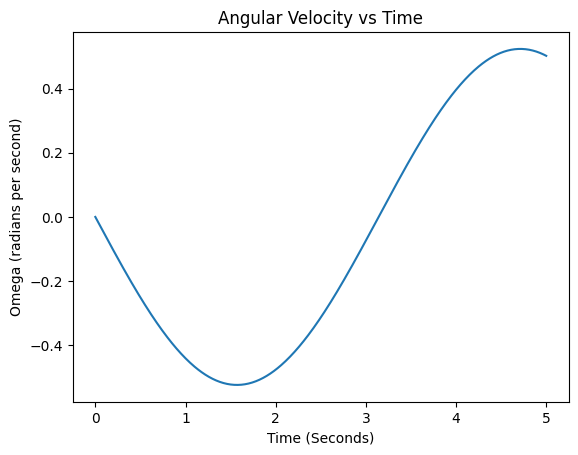

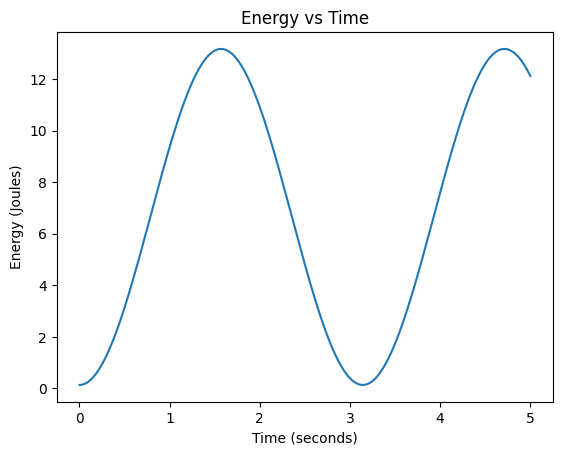

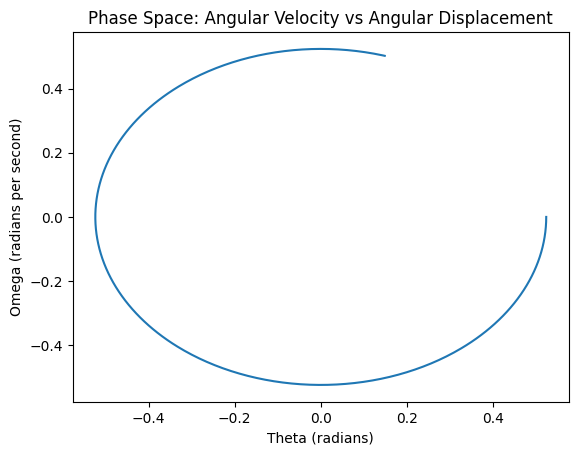

In [88]:
def rungeKuttaPen(start, final, t0, o0, h, gl):
    T = np.arange(start, final+h, h)
    N = np.abs(int((final-start)/h))
    OMEGA = np.zeros(N+1)
    THETA = np.zeros(N+1)
    THETA[0], OMEGA[0] = t0, o0
    for i in range(N):
        k1_t = h*OMEGA[i]
        k1_o = h*(-gl)*THETA[i]

        k2_t = h*(OMEGA[i]+k1_o/2)
        k2_o = h*(-gl*(THETA[i]+k1_t/2))
        OMEGA[i+1] = k2_o + OMEGA[i]
        THETA[i+1] = k2_t + THETA[i]
    return THETA, OMEGA, T


def rungeKuttaPenPlot(start, final, x0, v0, h, gl):
    X, V, H = rungeKuttaPen(start, final, x0, v0, h, gl)
    plt.figure()
    plt.plot(H, X)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Theta (radians)")
    plt.title("Angular Displacement vs Time")
    plt.show()

    plt.figure()
    plt.plot(H, V)
    plt.xlabel("Time (Seconds)")
    plt.ylabel("Omega (radians per second)")
    plt.title("Angular Velocity vs Time")
    plt.show()

    E = 0.5 * V * V *9.8 * 9.8 + 0.5 * gl * X * X 
    plt.figure()
    plt.plot(H, E)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Energy (Joules)")
    plt.title("Energy vs Time")
    plt.show()

    plt.figure()
    plt.plot(X, V)
    plt.xlabel("Theta (radians)")
    plt.ylabel("Omega (radians per second)")
    plt.title("Phase Space: Angular Velocity vs Angular Displacement")
    plt.show()

rungeKuttaPenPlot(0, 5, pi/6, 0, 0.01, 1)

### Total Energy of the Simple Pendulum

The total energy \( E \) of the system is given by the sum of kinetic and potential energy:

$$E = \frac{1}{2} \omega^2 + \frac{1}{2} \frac{g}{l} \theta^2$$

where:  
- $( \omega(t) )$ is the angular velocity in rad/s,  
- $( \theta(t) )$ is the angular displacement in radians,  
- $( g )$ is the acceleration due to gravity,  
- $( l )$ is the length of the pendulum.

This energy remains constant over time in the absence of damping.

### Derivation of the Total Energy

The equation of motion for a simple pendulum under the small-angle approximation is:

$$ \frac{d^2 \theta}{dt^2} = -\frac{g}{l} \theta $$

#### **1. Kinetic Energy \( T \):**
The velocity of the pendulum mass is related to its angular velocity \( \omega \) by:

$$ v = l \omega $$

The kinetic energy is:

$$ K_e = \frac{1}{2} m v^2 = \frac{1}{2} m (l\omega)^2 = \frac{1}{2} m l^2 \omega^2 $$

Setting \( m = 1 \):

$$ K_e = \frac{1}{2} \omega^2 l^2 $$

#### **2. Potential Energy \( U \):**
The height of the pendulum mass relative to its lowest point is approximately:

$$ h \approx l (1 - \cos\theta) $$

For small angles, using  $\cos\theta \approx 1 - \frac{\theta^2}{2}$, the height simplifies to:

$$ h \approx \frac{l}{2} \theta^2 $$

Thus, the potential energy is:

$$ U = mg h = g \frac{\theta^2}{2l} $$

Since \( m = 1 \):

$$ U = \frac{1}{2} \frac{g}{l} \theta^2 $$

#### **3. Total Energy:**
Summing kinetic and potential energy:

$$ E = K_e + U = \frac{1}{2} \omega^2 l^2 + \frac{1}{2} \frac{g}{l} \theta^2 $$

This is the total energy of the pendulum, which remains conserved in the absence of external forces like friction.


6. Nonlinear Pendulum
The equation of motion for a nonlinear pendulum (with no small angle
approximation) of length l is
d2θ
dt2 = −g
l sin θ
This can be written as two ordinary differential equations (ODES):
dθ
dt = ω and dω
dt = −g
l sin θ
Set g = 9.8m/s2, l = 1.
(a) (5 points) Compute and plot θ(t) over the range 0 < t < 5 s with
initial conditions at time t = 0 of θ = 0, ω = 1.0 rad/s. Explain
your results in terms of the expected period of the pendulum in the
linear regime |θ|  1, which corresponds to the simple harmonic
motion you explored in the previous problem.

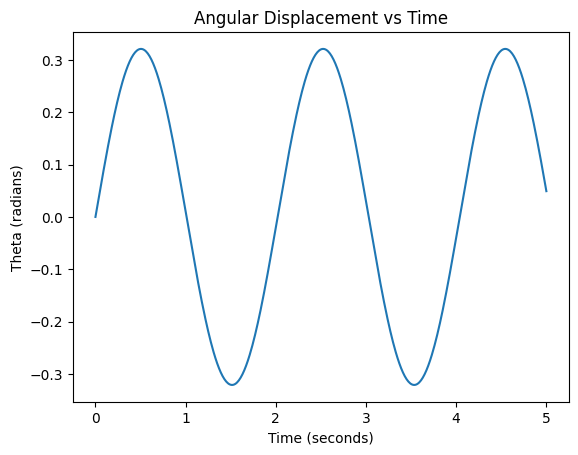

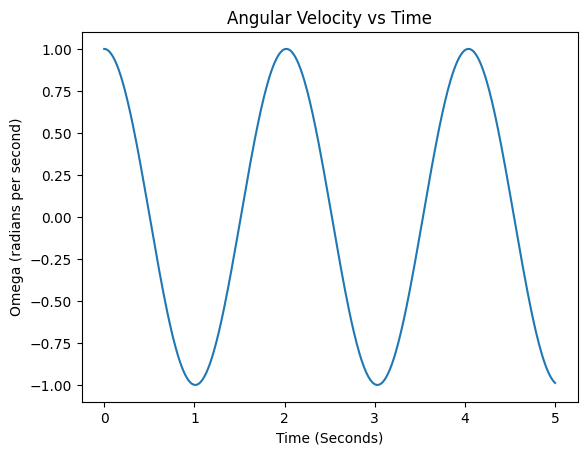

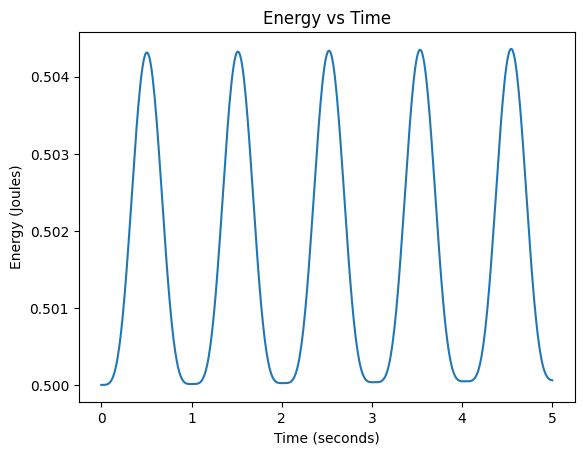

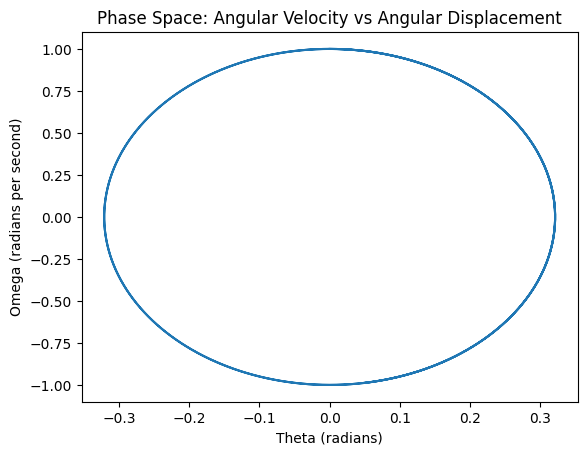

In [84]:
def rungeKuttaPen6(start, final, t0, o0, h, l):
    g = 9.8
    gl=9.8/l
    T = np.arange(start, final+h, h)
    N = np.abs(int((final-start)/h))
    OMEGA = np.zeros(N+1)
    THETA = np.zeros(N+1)
    THETA[0], OMEGA[0] = t0, o0
    for i in range(N):
        k1_t = h*OMEGA[i]
        k1_o = h*(-gl)*np.sin(THETA[i])

        k2_t = h*(OMEGA[i]+k1_o/2)
        k2_o = h*(-gl*np.sin(THETA[i]+k1_t/2))
        OMEGA[i+1] = k2_o + OMEGA[i]
        THETA[i+1] = k2_t + THETA[i]
    return THETA, OMEGA, T


def rungeKuttaPenPlot6(start, final, x0, v0, h, l):
    g=9.8
    gl=9.8/l

    X, V, H = rungeKuttaPen6(start, final, x0, v0, h, l)
    plt.figure()
    plt.plot(H, X)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Theta (radians)")
    plt.title("Angular Displacement vs Time")
    plt.show()

    plt.figure()
    plt.plot(H, V)
    plt.xlabel("Time (Seconds)")
    plt.ylabel("Omega (radians per second)")
    plt.title("Angular Velocity vs Time")
    plt.show()

    E = 0.5 * V * V *l * l + 0.5 * gl * X * X #9.8 * 9.8 is l *l
    plt.figure()
    plt.plot(H, E)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Energy (Joules)")
    plt.title("Energy vs Time")
    plt.show()

    plt.figure()
    plt.plot(X, V)
    plt.xlabel("Theta (radians)")
    plt.ylabel("Omega (radians per second)")
    plt.title("Phase Space: Angular Velocity vs Angular Displacement")
    plt.show()

rungeKuttaPenPlot6(0, 5, 0, 1, 0.01, 1)

By small angle approximation, $sin(x)\approx x$

Since we are using small angles, this question will be relatively similar to the one previous, with a slight scaling factor

(b) (10 points) Change your program to plot θ(t) for 50 different initial
conditions, all on the same graph (so there will be 50 curves on
this plot). For the 50 initial conditions at t = 0, make ω vary in
equal steps from zero to 10 rad/s, while keeping everything else
the same as in the previous part. If your variable for the initial
value of ω is called omega0 you can do this by writing
for omega0 in np.linspace(0,10,50):
You would put solving the ODE and adding a curve to the figure
inside the for loop.
The θ(t) curves should look different for large initial ω than for
small initial ω. Why is this? What is the exact value of initial ω
that separates the two behaviours?

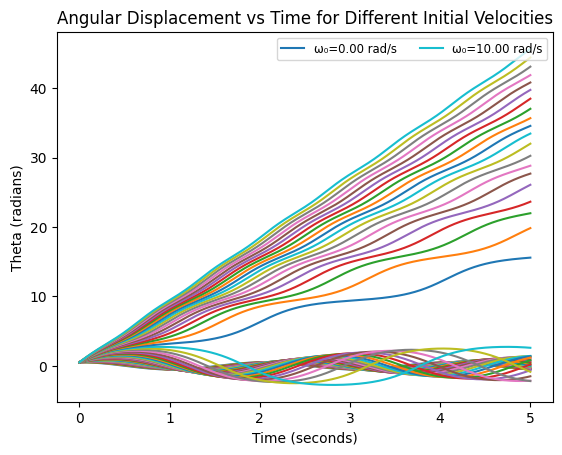

In [85]:
def rungeKuttaPen6(start, final, t0, o0, h, l):
    g = 9.8
    gl = g / l
    T = np.arange(start, final + h, h)
    N = len(T) - 1
    OMEGA = np.zeros(N + 1)
    THETA = np.zeros(N + 1)
    THETA[0], OMEGA[0] = t0, o0

    for i in range(N):
        k1_t = h * OMEGA[i]
        k1_o = h * (-gl * np.sin(THETA[i]))

        k2_t = h * (OMEGA[i] + k1_o / 2)
        k2_o = h * (-gl * np.sin(THETA[i] + k1_t / 2))

        OMEGA[i+1] = OMEGA[i] + k2_o
        THETA[i+1] = THETA[i] + k2_t
    
    return THETA, OMEGA, T

def rungeKuttaPenPlot6(start, final, h, l):
    g = 9.8
    gl = g / l
    num_simulations = 50

    plt.figure()
    
    for omega0 in np.linspace(0, 10, num_simulations):  
        X, V, H = rungeKuttaPen6(start, final, np.pi/6, omega0, h, l)
        plt.plot(H, X, label=f'ω₀={omega0:.2f} rad/s' if omega0 in [0, 5, 10] else "")

    plt.xlabel("Time (seconds)")
    plt.ylabel("Theta (radians)")
    plt.title("Angular Displacement vs Time for Different Initial Velocities")
    plt.legend(loc='upper right', fontsize='small', ncol=2)  
    plt.show()

rungeKuttaPenPlot6(0, 5, 0.01, 1)



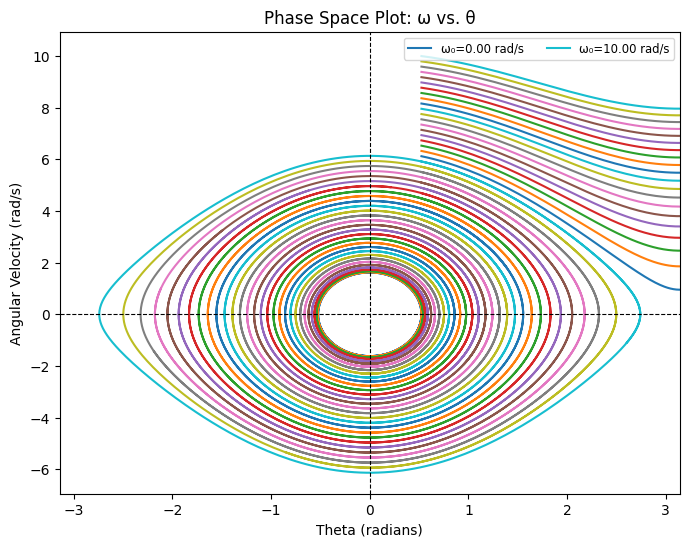

In [87]:
def rungeKuttaPenPhaseSpace(start, final, h, l):
    g = 9.8
    gl = g / l
    num_simulations = 50

    plt.figure(figsize=(8,6))
    
    for omega0 in np.linspace(0, 10, num_simulations):  
        X, V, _ = rungeKuttaPen6(start, final, np.pi/6, omega0, h, l)
        plt.plot(X, V, label=f'ω₀={omega0:.2f} rad/s' if omega0 in [0, 5, 10] else "")

    plt.xlabel("Theta (radians)")
    plt.ylabel("Angular Velocity (rad/s)")
    plt.title("Phase Space Plot: ω vs. θ")
    plt.xlim(-np.pi, np.pi)
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  
    plt.legend(loc='upper right', fontsize='small', ncol=2)
    plt.show()

rungeKuttaPenPhaseSpace(0, 5, 0.01, 1)